# **Klasifikasi Bagging Naive Bayes (Ecoli)**

Bagging (Bootstrap Aggregating) adalah teknik ensemble learning yang tujuannya mengurangi varians model dan meningkatkan akurasi dengan cara:

* Membuat beberapa subset data training menggunakan bootstrap sampling (sampling dengan pengembalian).

* Melatih beberapa model (dalam kasus ini → Naive Bayes) pada masing-masing subset.

* Menggabungkan hasil prediksi semua model dengan voting (untuk klasifikasi) atau rata-rata (untuk regresi).

Jadi, Bagging Naive Bayes = metode ensemble yang menggunakan banyak classifier Naive Bayes sekaligus, lalu menggabungkan prediksinya untuk hasil akhir.


Kita akan melakukan klasifikasi data ecoli menggunakan metode Bagging Naive Bayes:

* data ecoli sebelum oversampling
* data ecoli sesudah oversampling (SMOTE)
* data ecoli sesudah oversampling (ADASYN)

Mencari akurasi dari setiap jenis kondisi data dan mencari akurasi tertinggi atau terbaik


## **Instalasi Library**

Install library yang akan digunakan dalam mendukung proses pemodelan

In [ ]:
!pip install pandas scikit-learn matplotlib openpyxl pymysql


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB


## Pengambilan Data

Data ecoli diambil dari:
https://archive.ics.uci.edu/dataset/39/ecoli

dan dilakukan dengan cara:

1. data asli yang sudah berada pada csv
2. data oversampling smote yang sudah dalam bentuk xlsx
2. data oversampling adasyn yang sudah dalam bentuk xlsx

### Pengambilan data Ecoli asli

In [ ]:
from google.colab import files
import pandas as pd

# Upload file data_ecoli.xlsx
uploaded = files.upload()

# Baca file
df = pd.read_excel("data_ecoli.xlsx")
X = df.drop(columns=["class"])   # fitur
y = df["class"]

df


Saving data_ecoli.xlsx to data_ecoli (3).xlsx


,id,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,1,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,2,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,3,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,4,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,5,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp
...,...,...,...,...,...,...,...,...,...
331,332,0.74,0.56,0.48,0.5,0.47,0.68,0.30,pp
332,333,0.71,0.57,0.48,0.5,0.48,0.35,0.32,pp
333,334,0.61,0.60,0.48,0.5,0.44,0.39,0.38,pp
334,335,0.59,0.61,0.48,0.5,0.42,0.42,0.37,pp


### Pengambilan data Ecoli Oversampling (SMOTE)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_smote = pd.read_excel("hasil_smote.xlsx")
x_smote = df_smote.drop(columns=["class"])
y_smote = df_smote["class"]
df_smote


Saving hasil_smote.xlsx to hasil_smote.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1139,0.660161,0.679839,0.48,0.5,0.615080,0.440214,0.400054,pp
1140,0.755882,0.732574,0.48,0.5,0.439485,0.392574,0.391544,pp
1141,0.632786,0.854427,0.48,0.5,0.384427,0.464427,0.356719,pp
1142,0.734496,0.747339,0.48,0.5,0.316421,0.541008,0.523669,pp


### Pengambilan data Ecoli Oversampling (ADASYN)

In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df_adasyn = pd.read_excel("hasil_adasyn.xlsx")
x_adasyn = df_adasyn.drop(columns=["class"])
y_adasyn = df_adasyn["class"]
df_adasyn


Saving hasil_adasyn.xlsx to hasil_adasyn.xlsx


,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.490000,0.290000,0.48,0.5,0.560000,0.240000,0.350000,cp
1,0.070000,0.400000,0.48,0.5,0.540000,0.350000,0.440000,cp
2,0.560000,0.400000,0.48,0.5,0.490000,0.370000,0.460000,cp
3,0.590000,0.490000,0.48,0.5,0.520000,0.450000,0.360000,cp
4,0.230000,0.320000,0.48,0.5,0.550000,0.250000,0.350000,cp
...,...,...,...,...,...,...,...,...
1146,0.406464,0.508027,0.48,0.5,0.488118,0.670000,0.396282,im
1147,0.359502,0.539751,0.48,0.5,0.397687,0.665783,0.299092,im
1148,0.628443,0.534551,0.48,0.5,0.599400,0.790778,0.771856,im
1149,0.584697,0.617865,0.48,0.5,0.613573,0.688472,0.663775,im


## **Klasifikasi tanpa Oversampling**

Klasifikasi pada data ecoli sebelum melalui proses oversampling

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:512: RuntimeWarning: divide by zero encountered in log
  jointi = np.log(self.class_prior_[i])
/usr/local/lib/python3.12/dist-packages/sklearn/naiv

Akurasi: 0.9117647058823529
Classification Report:
               precision    recall  f1-score   support

          cp       0.94      1.00      0.97        32
          im       0.77      0.77      0.77        13
         imS       0.00      0.00      0.00         1
         imU       0.75      0.75      0.75         4
          om       1.00      1.00      1.00         6
         omL       1.00      1.00      1.00         1
          pp       1.00      0.91      0.95        11

    accuracy                           0.91        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.90      0.91      0.90        68



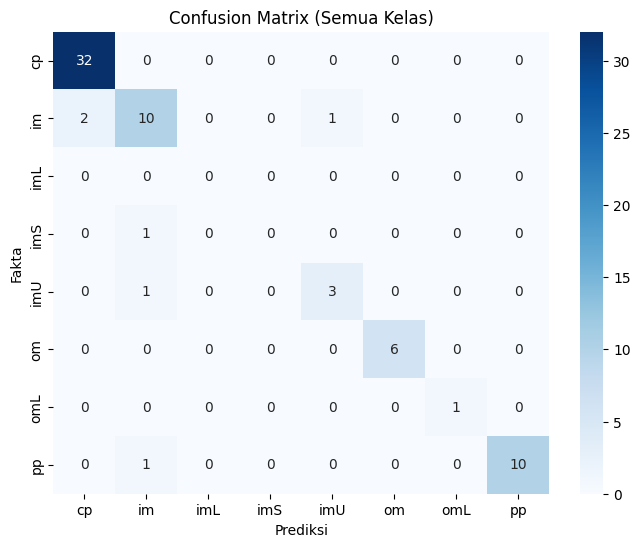

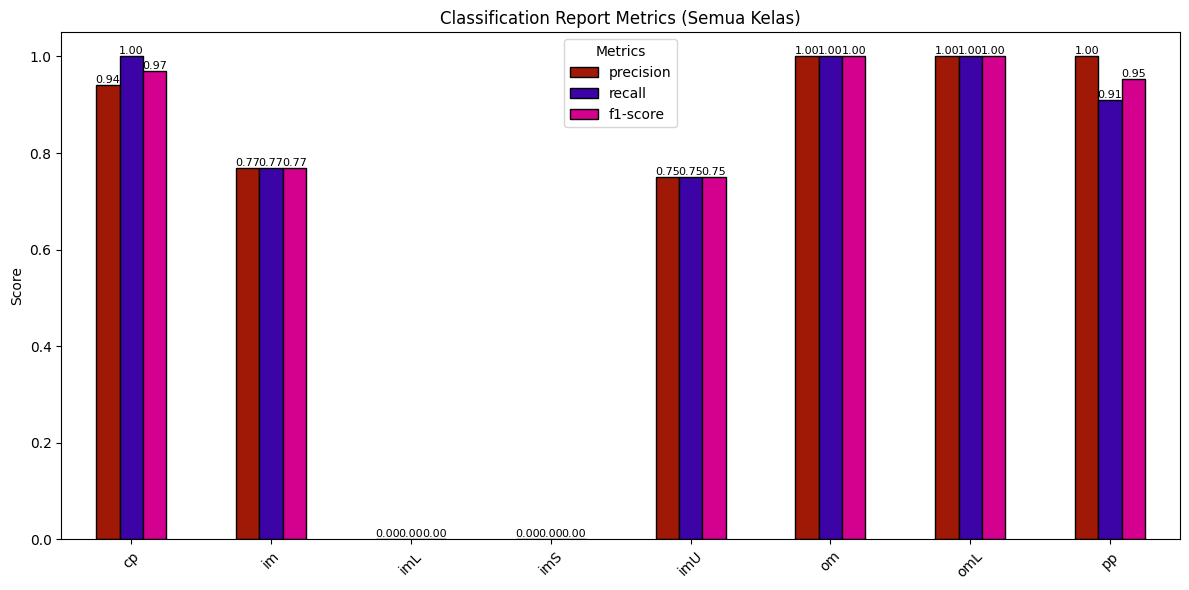

In [ ]:

X = df.drop(columns=["class"])
y = df["class"]

# =====================================================
# 2. Split data
# =====================================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =====================================================
# 3. Model Bagging Naive Bayes
# =====================================================
model = GaussianNB()
bagging = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging.fit(X_train, y_train)
prediksi = bagging.predict(X_test)

# =====================================================
# 4. Evaluasi
# =====================================================
akurasi = accuracy_score(y_test, prediksi)
print("Akurasi:", akurasi)
print("Classification Report:\n", classification_report(y_test, prediksi, zero_division=0))

# --- Confusion Matrix ---
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

# --- Classification Report ke DataFrame ---
all_labels = np.unique(np.concatenate([y_train, y_test]))
report = classification_report(
    y_test, prediksi, labels=all_labels,
    output_dict=True, zero_division=0
)
df_report = pd.DataFrame(report).transpose()

# =====================================================
# 5. Visualisasi precision, recall, f1-score
# =====================================================
metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua Kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# Label nilai di atas bar
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()


## **Klasifikasi Data Oversampling (SMOTE)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan SMOTE

Akurasi :  0.8296943231441049
Classification Report:
               precision    recall  f1-score   support

          cp       1.00      0.97      0.98        32
          im       0.69      0.79      0.73        28
         imL       1.00      1.00      1.00        29
         imS       1.00      1.00      1.00        31
         imU       0.70      0.59      0.64        27
          om       1.00      0.28      0.43        29
         omL       0.95      1.00      0.97        19
          pp       0.62      1.00      0.76        34

    accuracy                           0.83       229
   macro avg       0.87      0.83      0.82       229
weighted avg       0.87      0.83      0.81       229



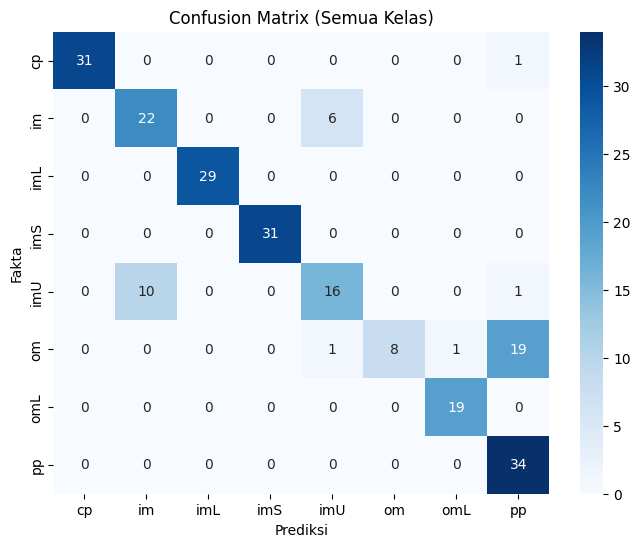

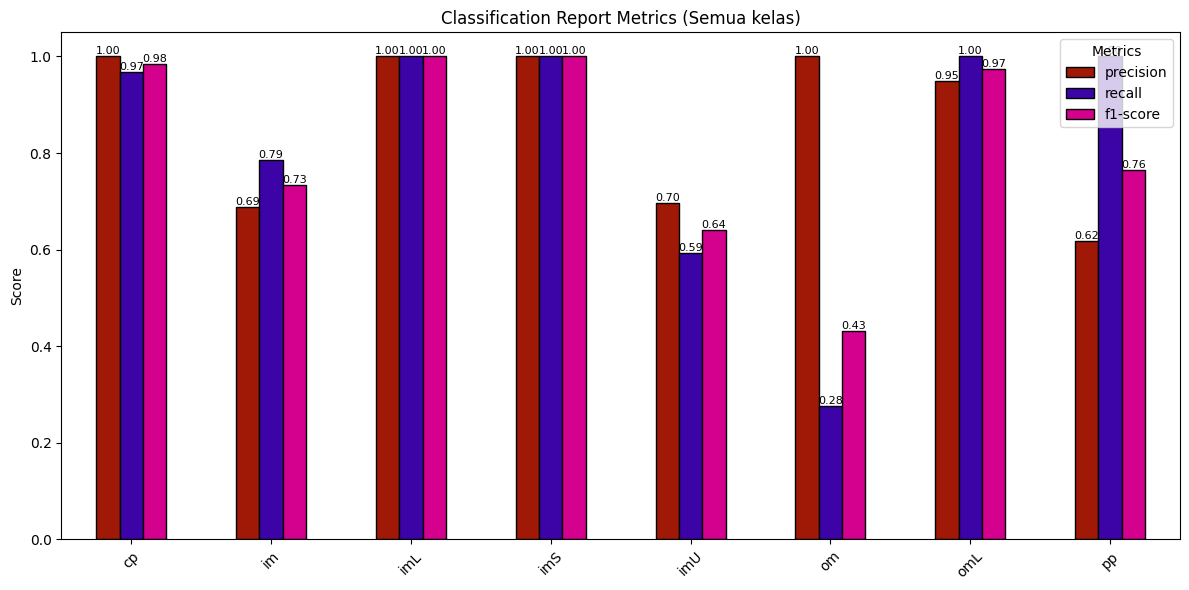

In [ ]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    x_smote, y_smote, test_size=0.2, random_state=42
)

model = GaussianNB()
bagging_smote = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging_smote.fit(X_train_smote, y_train_smote)

prediksi_smote = bagging_smote.predict(X_test_smote)

akurasi_smote = accuracy_score(y_test_smote, prediksi_smote)
print("Akurasi : ", akurasi_smote)
print("Classification Report:\n", classification_report(y_test_smote, prediksi_smote, zero_division=0))


# confuison matrix
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))

report = classification_report(
    y_test_smote, prediksi_smote, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"],
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Klasifikasi Data Oversampling (ADASYN)**

Klasifikasi pada data ecoli sesudah melalui proses oversampling menggunakan ADASYN

accuracy_score : 0.8441558441558441
Classification Report:
               precision    recall  f1-score   support

          cp       0.91      0.97      0.94        31
          im       0.83      0.68      0.75        28
         imL       1.00      1.00      1.00        27
         imS       0.94      1.00      0.97        29
         imU       0.85      0.71      0.77        31
          om       1.00      0.53      0.69        36
         omL       1.00      1.00      1.00        21
          pp       0.55      1.00      0.71        28

    accuracy                           0.84       231
   macro avg       0.88      0.86      0.85       231
weighted avg       0.88      0.84      0.84       231



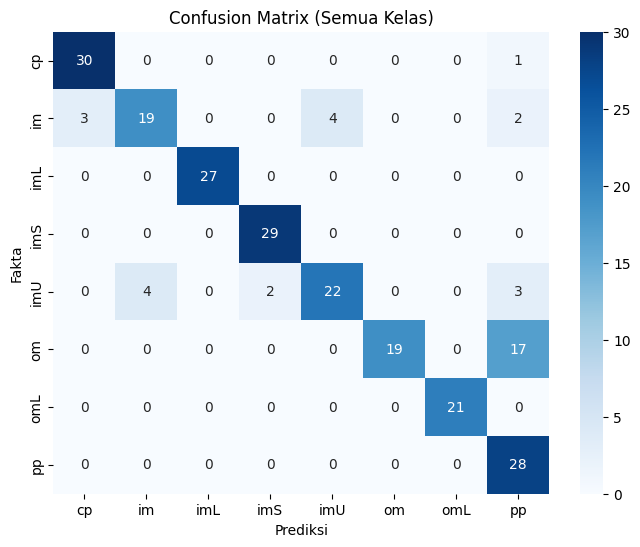

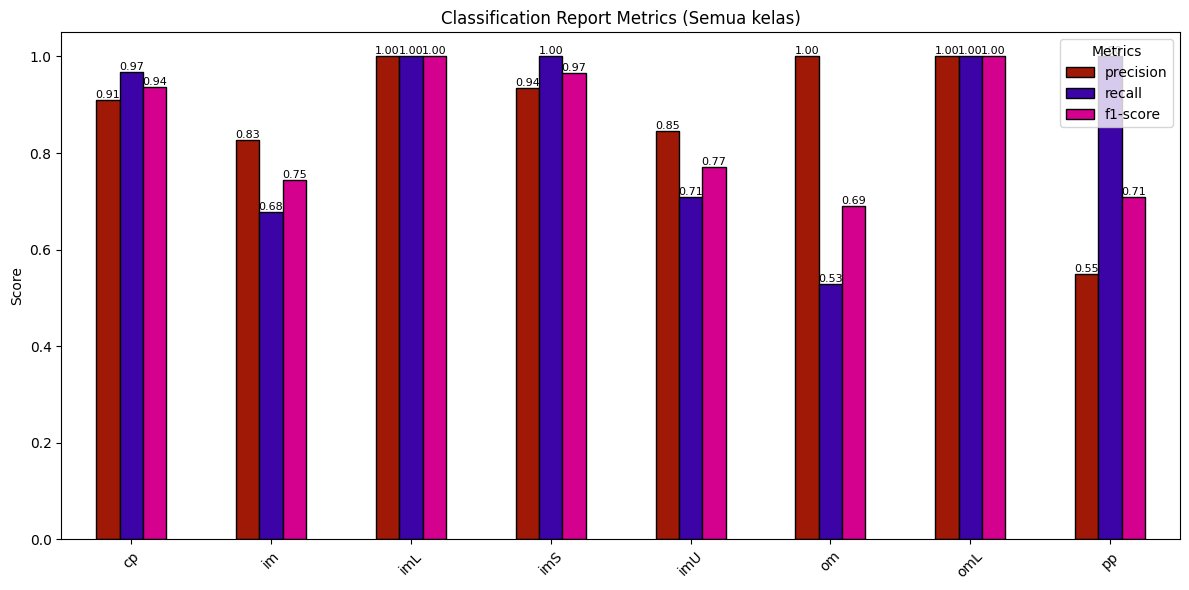

In [ ]:
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(
    x_adasyn, y_adasyn, test_size=0.2, random_state=42
)

model = GaussianNB()

bagging_adasyn = BaggingClassifier(estimator=model, n_estimators=100, random_state=42)

bagging_adasyn.fit(X_train_adasyn, y_train_adasyn)

prediksi_adasyn = bagging_adasyn.predict(X_test_adasyn)

akurasi_adasyn = accuracy_score(y_test_adasyn, prediksi_adasyn)
print(f"accuracy_score : {akurasi_adasyn}")
print("Classification Report:\n", classification_report(y_test_adasyn, prediksi_adasyn))


labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Prediksi")
plt.ylabel("Fakta")
plt.title("Confusion Matrix (Semua Kelas)")
plt.show()

all_labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))

report = classification_report(
    y_test_adasyn, prediksi_adasyn, labels=all_labels,
    output_dict=True, zero_division=0
)

df_report = pd.DataFrame(report).transpose()

metrics_df = df_report[['precision','recall','f1-score']].iloc[:-3]

# warna diagram batang
ax = metrics_df.plot(
    kind='bar',
    figsize=(12,6),
    color=["#a01806", "#3c03a7", "#d4008e"], # biru, oranye, hijau
    edgecolor='black'
)

plt.title("Classification Report Metrics (Semua kelas)")
plt.ylabel("Score")
plt.ylim(0,1.05)
plt.xticks(rotation=45)

# diagram batang
for p in ax.patches:
    value = f"{p.get_height():.2f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom', fontsize=8, rotation=0)

plt.legend(title="Metrics")
plt.tight_layout()
plt.show()

## **Perbandingan Akurasi**

Membandingkan akurasi data ecoli:

1. Data Asli
2. Data Oversampling SMOTE
2. Data Oversampling ADASYN



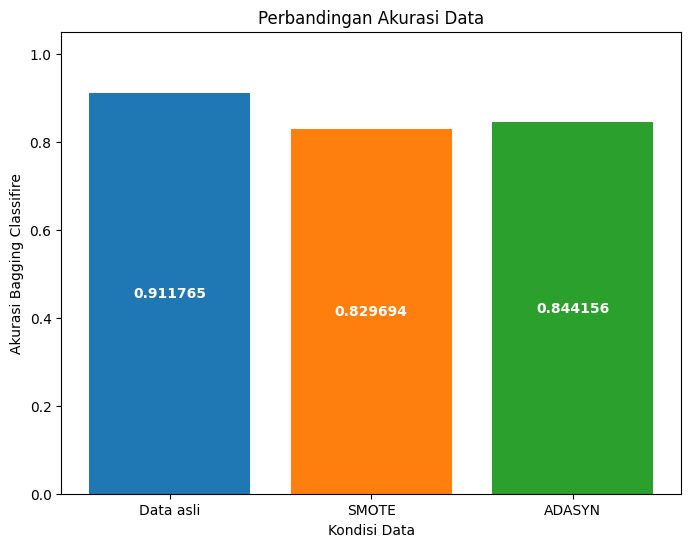

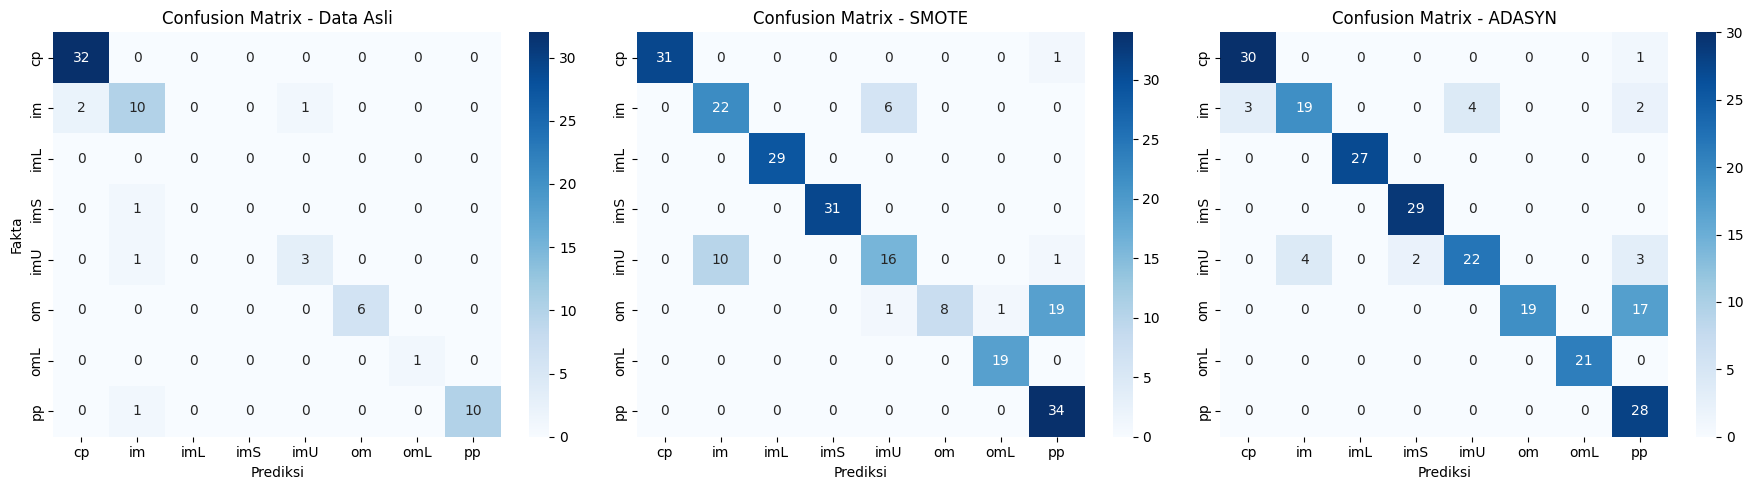

In [ ]:
label = ['Data asli', 'SMOTE', 'ADASYN']
temp = [akurasi, akurasi_smote, akurasi_adasyn]

fig, ax = plt.subplots(figsize=(8,6))

bc = ax.bar(label, temp, color=['#1f77b4','#ff7f0e','#2ca02c'])

ax.bar_label(bc, label_type='center', color='w', fontweight='bold')

ax.set(
    xlabel='Kondisi Data',
    ylabel='Akurasi Bagging Classifire',
    title='Perbandingan Akurasi Data'
)

ax.set_ylim(0, 1.05)

plt.show()


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Data asli
labels = np.unique(np.concatenate([y_train, y_test]))
cm = confusion_matrix(y_test, prediksi, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[0])
axes[0].set_title("Confusion Matrix - Data Asli")
axes[0].set_xlabel("Prediksi")
axes[0].set_ylabel("Fakta")

# Data SMOTE
labels = np.unique(np.concatenate([y_train_smote, y_test_smote]))
cm = confusion_matrix(y_test_smote, prediksi_smote, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[1])
axes[1].set_title("Confusion Matrix - SMOTE")
axes[1].set_xlabel("Prediksi")
axes[1].set_ylabel("")

# Data ADASYN
labels = np.unique(np.concatenate([y_train_adasyn, y_test_adasyn]))
cm = confusion_matrix(y_test_adasyn, prediksi_adasyn, labels=labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels, ax=axes[2])
axes[2].set_title("Confusion Matrix - ADASYN")
axes[2].set_xlabel("Prediksi")
axes[2].set_ylabel("")

plt.tight_layout()
plt.show()

## **Kesimpulan**

Kesimpulan dari Hasil Bagging Naive Bayes

Berdasarkan hasil pengujian menggunakan metode Bagging Naive Bayes pada tiga kondisi data (data asli, data hasil SMOTE, dan data hasil ADASYN), diperoleh beberapa temuan:

1. Perbandingan Akurasi

    * Akurasi pada data asli 91% dan data ADASYN 84,41%, sedangkan pada data SMOTE sedikit lebih rendah, yaitu 82,96%.

    * Hal ini menunjukkan bahwa secara keseluruhan, Bagging Naive Bayes bekerja cukup stabil baik pada data asli maupun data hasil oversampling ADASYN, sementara SMOTE sedikit menurunkan akurasi.

2. Confusion Matrix – Data Asli

    * Model mampu mengenali kelas mayoritas dengan cukup baik (misalnya cp, imL, imS).

    * Namun, masih terdapat kesalahan klasifikasi pada kelas minoritas seperti imu, om, omL, yang sering salah diprediksi sebagai kelas lain.

3. Confusion Matrix – SMOTE

    * Setelah dilakukan SMOTE, distribusi data menjadi lebih seimbang sehingga kelas minoritas seperti imu dan pp lebih sering terdeteksi.

    * Akan tetapi, terdapat peningkatan jumlah kesalahan prediksi pada beberapa kelas (contohnya im dan om), sehingga menurunkan akurasi total.

4. Confusion Matrix – ADASYN

    * Hasil ADASYN mirip dengan data asli, dengan pola kesalahan klasifikasi yang relatif sama.

    * Namun, ADASYN mampu sedikit membantu dalam mendeteksi beberapa kelas minoritas dibanding data asli, tanpa menurunkan akurasi secara signifikan.

5. Kesimpulan Umum

    * Metode Bagging Naive Bayes cukup efektif untuk menangani data asli dan hasil oversampling ADASYN, menghasilkan akurasi yang seimbang.

    * SMOTE, meskipun meningkatkan representasi kelas minoritas, justru sedikit menurunkan performa model karena menyebabkan prediksi yang lebih menyebar dan tidak stabil.

    * Dengan demikian, jika tujuan penelitian adalah mempertahankan akurasi yang tinggi sekaligus tetap memperhatikan kelas minoritas, kombinasi Bagging Naive Bayes dengan ADASYN dapat dianggap sebagai pilihan yang lebih baik dibanding SMOTE.